In [4]:
#pip install pandas-profiling==3.6.2

In [1]:
from tcrdist.repertoire import TCRrep
from tcrdist.plotting import plot_pairings, _write_svg
import pandas as pd
from tcrdist.repertoire import TCRrep
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas_profiling import ProfileReport
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [3]:
df_copy= pd.read_csv('vdjdb.txt',sep='\t')

profile=ProfileReport(df,title='data report')

In [180]:
df_copy.head()

complex.id gene                  cdr3       v.segm      j.segm  \
0           1  TRA         CIVRAPGRADMRF  TRAV26-1*01   TRAJ43*01   
1           1  TRB  CASSYLPGQGDHYSNQPQHF    TRBV13*01  TRBJ1-5*01   
2           0  TRB   CASSFEAGQGFFSNQPQHF    TRBV13*01  TRBJ1-5*01   
3           2  TRA        CAVPSGAGSYQLTF    TRAV20*01   TRAJ28*01   
4           2  TRB   CASSFEPGQGFYSNQPQHF    TRBV13*01  TRBJ1-5*01   

       species     mhc.a mhc.b mhc.class antigen.epitope antigen.gene  \
0  HomoSapiens  HLA-B*08   B2M      MHCI        FLKEKGGL          Nef   
1  HomoSapiens  HLA-B*08   B2M      MHCI        FLKEKGGL          Nef   
2  HomoSapiens  HLA-B*08   B2M      MHCI        FLKEKGGL          Nef   
3  HomoSapiens  HLA-B*08   B2M      MHCI        FLKEKGGL          Nef   
4  HomoSapiens  HLA-B*08   B2M      MHCI        FLKEKGGL          Nef   

  antigen.species   reference.id  \
0           HIV-1  PMID:15596521   
1           HIV-1  PMID:15596521   
2           HIV-1  PMID:15596521   
3           HIV-1  PMID:15596521   
4           HIV-1  PMID:15596521   

                                              method  \
0  {"frequency": "", "identification": "tetramer-...   
1  {"frequency": "", "identification": "tetramer-...   
2  {"frequency": "", "identification": "tetramer-...   
3  {"frequency": "", "identification": "tetramer-...   
4  {"frequency": "", "identification": "tetramer-...   

                                                meta  \
0  {"cell.subset": "CD8+", "clone.id": "", "donor...   
1  {"cell.subset": "CD8+", "clone.id": "", "donor...   
2  {"cell.subset": "CD8+", "clone.id": "", "donor...   
3  {"cell.subset": "CD8+", "clone.id": "", "donor...   
4  {"cell.subset": "CD8+", "clone.id": "", "donor...   

                                             cdr3fix  vdjdb.score web.method  \
0  {"cdr3": "CIVRAPGRADMRF", "cdr3_old": "CIVRAPG...            2       sort   
1  {"cdr3": "CASSYLPGQGDHYSNQPQHF", "cdr3_old": "...            2       sort   
2  {"cdr3": "CASSFEAGQGFFSNQPQHF", "cdr3_old": "C...            2       sort   
3  {"cdr3": "CAVPSGAGSYQLTF", "cdr3_old": "CAVPSG...            2       sort   
4  {"cdr3": "CASSFEPGQGFYSNQPQHF", "cdr3_old": "C...            2       sort   

  web.method.seq web.cdr3fix.nc web.cdr3fix.unmp  
0         sanger             no               no  
1         sanger             no               no  
2         sanger             no               no  
3         sanger             no               no  
4         sanger             no               no

In [181]:
len(df_copy)

92771

In [182]:
#df1=df[['antigen.epitope','antigen.gene','antigen.species']]

proof reference for the making the HIV and HIV-1 and HIV1 are the same 
 - https://www.aidsmap.com/about-hiv/hiv-1-and-hiv-2#:~:text=HIV%2D1%20comprises%20groups%20M,2%20subtypes%2C%20A%20and%20B.&text=Due%20to%20the%20genetic%20difference,not%20reliably%20detect%20HIV%2D2.
 - https://www.frontiersin.org/articles/10.3389/fimmu.2019.02820/full(Using random forest)

In [183]:
df1=df_copy[df_copy['vdjdb.score'].isin([2, 3,1])]

In [184]:
len(df1)

12414

In [185]:
df1 = df1.drop(['reference.id', 'method', 'meta','cdr3fix'], axis=1)

In [186]:
df1['antigen.species'].unique()

array(['HIV-1', 'TriticumAestivum', 'SARS-CoV-2', 'HomoSapiens', 'CMV',
       'M.tuberculosis', 'EBV', 'HTLV-1', 'GallusGallus', 'MusMusculus',
       'InfluenzaA', 'Synthetic', 'VSV', 'SaccharomycesCerevisiae',
       'ManducaSexta', 'HCV', 'synthetic', 'E.Coli', 'HHV', 'LCMV',
       'DENV1', 'DENV3/4', 'PlasmodiumBerghei',
       'SelaginellaMoellendorffii', 'PseudomonasFluorescens',
       'PseudomonasAeruginosa', 'HIV1', 'Homo sapiens', 'YFV', 'RSV',
       'HSV-2', 'DENV2', 'HPV-16', 'MCMV', 'MCPyV', 'Wheat', 'SIV', 'HIV'],
      dtype=object)

df2=df.copy()
for i in range(0,len(df1)):
    j=df2['antigen.species'][i]
    if j == 'HIV1' or j=='HIV':
        df2['antigen.species'][i]='HIV-1'

Since the there only 2 distint values in "Gene" variable, we will be implementing 1 hot encoding  

In [187]:
df2.columns

NameError: name 'df2' is not defined

In [ ]:
cdr_sequence=pd.DataFrame()

In [ ]:
cdr_sequence=df2['cdr3']

In [188]:
amino_acids = [cdr_sequence[i:i+3] for i in range(0, len(cdr_sequence), 3)]

NameError: name 'cdr_sequence' is not defined

In [ ]:
cdr_sequence.join(amino_acids)

In [189]:
Encoded_df= pd.get_dummies(df2,dtype='int',columns=['gene', 'species'])

NameError: name 'df2' is not defined

In [190]:
Encoded_df

NameError: name 'Encoded_df' is not defined

In [79]:
import numpy as np

# Define the amino acid alphabet
amino_acid_alphabet = 'ACDEFGHIKLMNPQRSTVWY'

def cdr_to_one_hot(cdr_sequence):
    one_hot_encoding = np.zeros((len(cdr_sequence), len(amino_acid_alphabet)))

    for i, amino_acid in enumerate(cdr_sequence):
        #print(i,amino_acid)
        if amino_acid in amino_acid_alphabet:
            index = amino_acid_alphabet.index(amino_acid)
            one_hot_encoding[i, index] = 1

    return one_hot_encoding

# Example CDR sequence
cdr_sequence = "CASSYLPGQGDHYSNQPQHF"

# Convert CDR sequence to one-hot representation
one_hot_representation = cdr_to_one_hot(cdr_sequence)

# Display the result
print("CDR Sequence:", cdr_sequence)
print("One-Hot Representation:")
print(one_hot_representation)

CDR Sequence: CASSYLPGQGDHYSNQPQHF
One-Hot Representation:
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 

### Similarity Distance

In [84]:
df=df_copy.copy()

In [88]:
df.isna().sum()

complex.id             0
gene                   0
cdr3                   0
v.segm               101
j.segm              1145
species                0
mhc.a                  0
mhc.b                  0
mhc.class              0
antigen.epitope        0
antigen.gene          62
antigen.species        0
reference.id        1511
method                 0
meta                   0
cdr3fix                0
vdjdb.score            0
web.method             0
web.method.seq         0
web.cdr3fix.nc         0
web.cdr3fix.unmp       0
dtype: int64

In [89]:
df=df.dropna()
print(len(df))
df=df[df['vdjdb.score']!=0]

90071


In [16]:
len(df)

12042

In [17]:
df1 = df.drop(['reference.id', 'method', 'meta','cdr3fix','vdjdb.score','web.method','web.method.seq','web.cdr3fix.nc','web.cdr3fix.unmp'], axis=1)

In [18]:
df_aa= df1[df1['gene']=='TRA']
df_bb= df1[df1['gene']=='TRB']

## Alpha Chain

In [19]:
df_alpha=df_aa.rename(columns={'antigen.epitope': 'epitope', 'v.segm': 'v_a_gene','j.segm': 'j_a_gene','cdr3': 'cdr3_a_aa','species':'subject'})

In [20]:
df_alpha = df_alpha.drop(['complex.id', 'gene', 'mhc.a','mhc.b','mhc.class','antigen.gene','antigen.species'], axis=1)

In [21]:
len(df_alpha)

3653

In [22]:
df_alpha=df_alpha.drop_duplicates()
df_alpha

cdr3_a_aa         v_a_gene   j_a_gene      subject  \
0          CIVRAPGRADMRF      TRAV26-1*01  TRAJ43*01  HomoSapiens   
3         CAVPSGAGSYQLTF        TRAV20*01  TRAJ28*01  HomoSapiens   
7          CAYRPPGTYKYIF  TRAV38-2/DV8*01  TRAJ40*01  HomoSapiens   
9          CIVRAPGRADMRF      TRAV26-1*01  TRAJ43*01  HomoSapiens   
12        CAVPSGAGSYQLTF        TRAV20*01  TRAJ28*01  HomoSapiens   
...                  ...              ...        ...          ...   
92681         CIALNARLMF      TRAV26-1*01  TRAJ31*01  HomoSapiens   
92683   CAMREGRYSSASKIIF    TRAV14/DV4*01   TRAJ3*01  HomoSapiens   
92685   CLVGDGDGGATNKLIF         TRAV4*01  TRAJ32*01  HomoSapiens   
92689  CAASVLYGSSNTGKLIF    TRAV29/DV5*01  TRAJ37*01  HomoSapiens   
92767       CAPQGATNKLIF      TRAV12-2*01  TRAJ32*01  HomoSapiens   

             epitope  
0           FLKEKGGL  
3           FLKEKGGL  
7           FLKEKGGL  
9           FLKEQGGL  
12          FLKEQGGL  
...              ...  
92681   PQPELPYPQPQL  
92683   FPQPEQPFPWQP  
92685   FPQPEQPFPWQP  
92689   QLQPFPQPELPY  
92767  PQQPFPQPEQPFP  

[2421 rows x 5 columns]

### Mouse

In [23]:
df_am=df_alpha[df_alpha['subject']=='MusMusculus']
df_am=df_am.drop(['subject'], axis=1)
print(len(df_am))

640


In [24]:
tr_am = TCRrep(cell_df = df_am,
            organism = 'mouse',
            chains = ['alpha'],
            db_file = 'alphabeta_gammadelta_db.tsv')
#tr_am.pw_alpha
tr_am.kargs_a['cdr3_a_aa']['gap_penalty'] = 5 
#tr_am.kargs_b['cdr3_b_aa']['gap_penalty'] = 5 

tr_am.compute_distances()
tr_am.pw_cdr3_a_aa

C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")
C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:833: FutureWarning: The provided callable <function sum at 0x0000017E9F3ADA80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  clones = cell_df.groupby(index_cols)['count'].agg(np.sum).reset_index()


array([[ 0, 27, 25, ..., 40, 40, 23],
       [27,  0, 22, ..., 13, 13, 33],
       [25, 22,  0, ..., 37, 39, 27],
       ...,
       [40, 13, 37, ...,  0,  4, 37],
       [40, 13, 39, ...,  4,  0, 39],
       [23, 33, 27, ..., 37, 39,  0]], dtype=int16)

In [30]:
Alpha_mouse_vector = pd.DataFrame(tr_am.pw_cdr3_a_aa)
#Alpha_mouse_vector.to_csv('Alpha_mouse_vector.csv')

In [60]:
df1 = df_am.reset_index(drop=True)
df2 = Alpha_mouse_vector.reset_index(drop=True)
result = pd.concat([df1, df2], axis=1)
result.to_csv('Alpha_mouse_vector.csv')

In [88]:
import umap
from sklearn.preprocessing import StandardScaler
reducer = umap.UMAP(random_state= 42)
human_data = StandardScaler().fit_transform(tr_am.pw_cdr3_a_aa)
embedding = reducer.fit_transform(human_data)

embedding_df = pd.DataFrame(embedding, columns= ['UMAP-1', 'UMAP-2'])

C:\Users\shara\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [89]:
l=df_am['epitope'].tolist()
embedding_df['epitope']=l

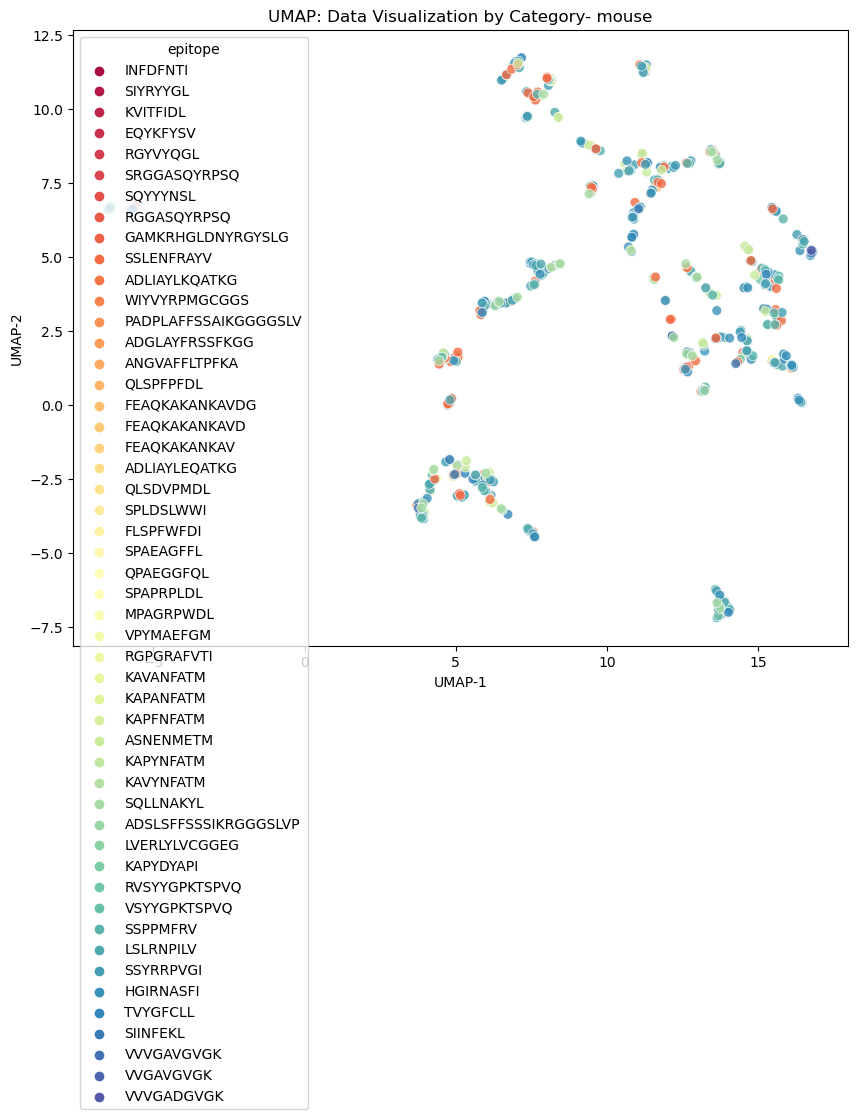

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP-1', y='UMAP-2', data=embedding_df,hue='epitope',palette='Spectral', s=50, alpha=0.8)
plt.title('UMAP: Data Visualization by Category- mouse')
plt.show()

np.savetxt('Alpha_mouse.csv',tr_am.pw_cdr3_a_aa,delimiter=',',fmt='%d')

### Human

In [31]:
df_ah=df_alpha[df_alpha['subject']=='HomoSapiens']
#df_ah=df_h.drop(['subject'], axis=1)

In [32]:
len(df_ah)

1781

In [33]:
tr_ah = TCRrep(cell_df = df_ah,
            organism = 'human',
            chains = ['alpha'],
            db_file = 'alphabeta_gammadelta_db.tsv')
#tr_ah.pw_alpha
tr_ah.kargs_a['cdr3_a_aa']['gap_penalty'] = 5 
#tr_am.kargs_b['cdr3_b_aa']['gap_penalty'] = 5 
tr_ah.pw_cdr3_a_aa

C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")
C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:792: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.cell_df['count'] = 1
C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:833: FutureWarning: The provided callable <function sum at 0x0000017E9F3ADA80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable 

array([[ 0, 30, 30, ..., 33, 28, 36],
       [30,  0,  0, ..., 31, 32, 35],
       [30,  0,  0, ..., 31, 32, 35],
       ...,
       [33, 31, 31, ...,  0, 32, 19],
       [28, 32, 32, ..., 32,  0, 35],
       [36, 35, 35, ..., 19, 35,  0]], dtype=int16)

In [34]:
Alpha_human_vector = pd.DataFrame(tr_ah.pw_cdr3_a_aa)
#Alpha_human_vector.to_csv('Alpha_human_vector.csv')

In [61]:
df1 = df_ah.reset_index(drop=True)
df2 = Alpha_human_vector.reset_index(drop=True)
result = pd.concat([df1, df2], axis=1)
result.to_csv('Alpha_human_vector.csv')

C:\Users\shara\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


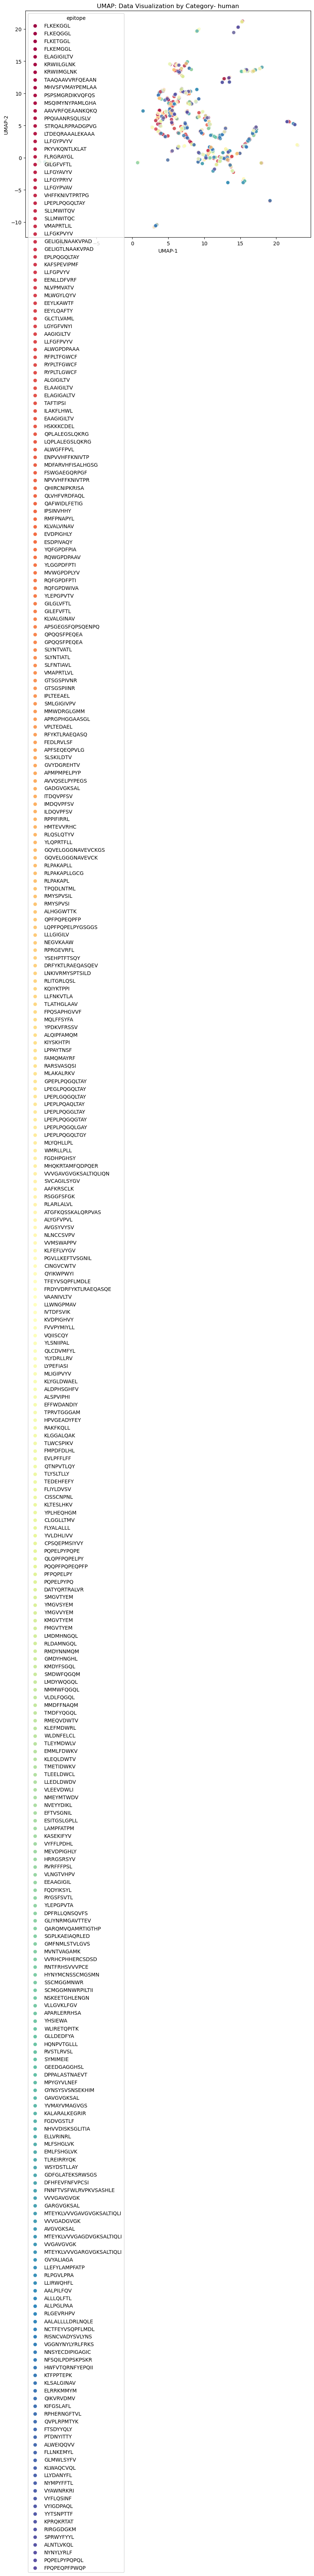

In [119]:
from sklearn.preprocessing import StandardScaler
reducer = umap.UMAP(random_state= 42)
human_data = StandardScaler().fit_transform(tr_ah.pw_cdr3_a_aa)
embedding = reducer.fit_transform(human_data)

embedding_df = pd.DataFrame(embedding, columns= ['UMAP-1', 'UMAP-2'])

l=df_ah['epitope'].tolist()
embedding_df['epitope']=l

plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP-1', y='UMAP-2', data=embedding_df,hue='epitope',palette='Spectral', s=50, alpha=0.8)
plt.title('UMAP: Data Visualization by Category- human')
plt.show()

In [95]:
l=df_ah['epitope'].tolist()
embedding_df['epitope']=l

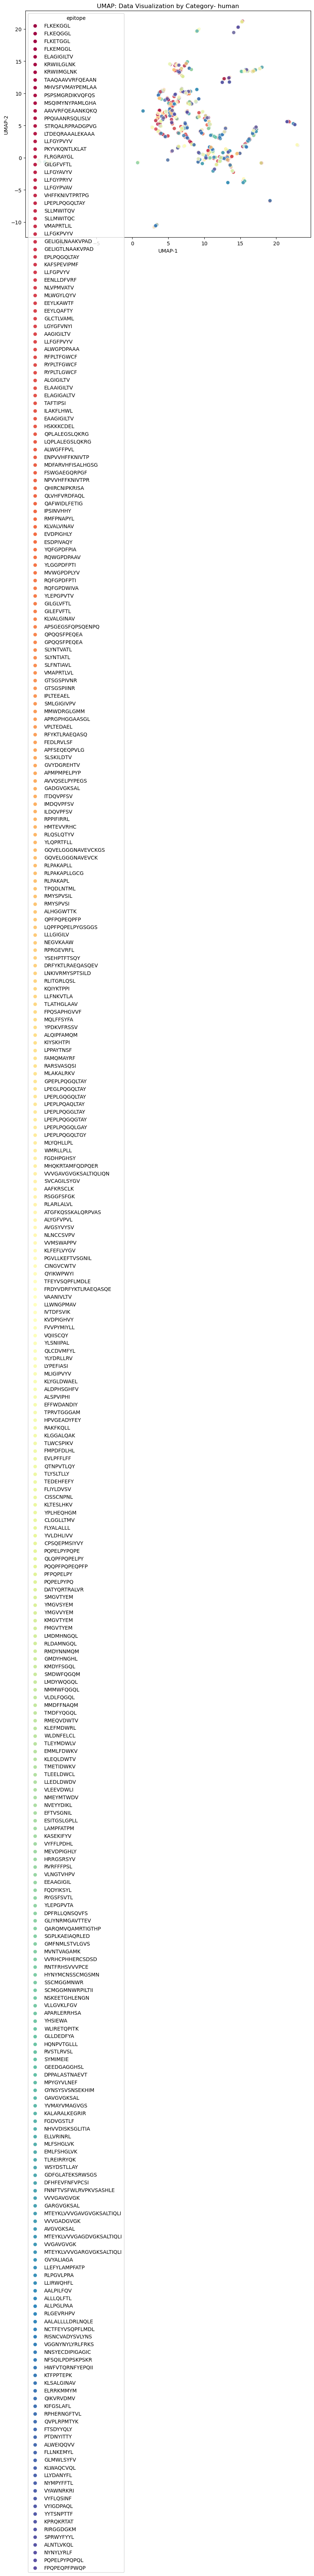

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP-1', y='UMAP-2', data=embedding_df,hue='epitope',palette='Spectral', s=50, alpha=0.8)
plt.title('UMAP: Data Visualization by Category- human')
plt.show()

In [313]:
np.savetxt('Alpha_human.csv',tr_ah.pw_cdr3_a_aa,delimiter=',',fmt='%d')

## Beta Chain

In [35]:
df_bb=df_bb.rename(columns={'antigen.epitope': 'epitope', 'v.segm': 'v_b_gene','j.segm': 'j_b_gene','cdr3': 'cdr3_b_aa','species':'subject'})

In [36]:
df_Beta = df_bb.drop(['complex.id', 'gene', 'mhc.a','mhc.b','mhc.class','antigen.gene','antigen.species'], axis=1)

In [37]:
len(df_bb)

8389

### Mouse

In [62]:
df_bm=df_Beta[df_Beta['subject']=='MusMusculus']
df_bm=df_bm.drop(['subject'], axis=1)
df_bm = df_bm.groupby(list(df_bm.columns)).size().reset_index(name='count')

In [63]:
tr_bm = TCRrep(cell_df = df_bm,
            organism = 'mouse',
            chains = ['beta'],
            db_file = 'alphabeta_gammadelta_db.tsv')
tr_bm.pw_beta
tr_bm.pw_cdr3_b_aa

C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:833: FutureWarning: The provided callable <function sum at 0x0000017E9F3ADA80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  clones = cell_df.groupby(index_cols)['count'].agg(np.sum).reset_index()


array([[ 0, 32, 25, ..., 47, 47, 31],
       [32,  0, 24, ..., 35, 31, 31],
       [25, 24,  0, ..., 39, 39, 34],
       ...,
       [47, 35, 39, ...,  0,  5, 35],
       [47, 31, 39, ...,  5,  0, 35],
       [31, 31, 34, ..., 35, 35,  0]], dtype=int16)

In [64]:
Beta_mouse_vector = pd.DataFrame(tr_bm.pw_cdr3_b_aa)
#Beta_mouse_vector.to_csv('Beta_mouse_vector.csv')

In [65]:
#tr_bm.clone_df

In [66]:
df1 = df_bm.reset_index(drop=True)
df2 = Beta_mouse_vector.reset_index(drop=True)
result = pd.concat([df1, df2], axis=1)
result.to_csv('Beta_mouse_vector.csv')

In [204]:
print(tr_bm.pw_cdr3_b_aa.shape)
reducer = umap.UMAP(random_state= 42)
human_data = StandardScaler().fit_transform(tr_bm.pw_cdr3_b_aa)
embedding = reducer.fit_transform(human_data)
len(embedding)

(745, 745)


C:\Users\shara\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


745

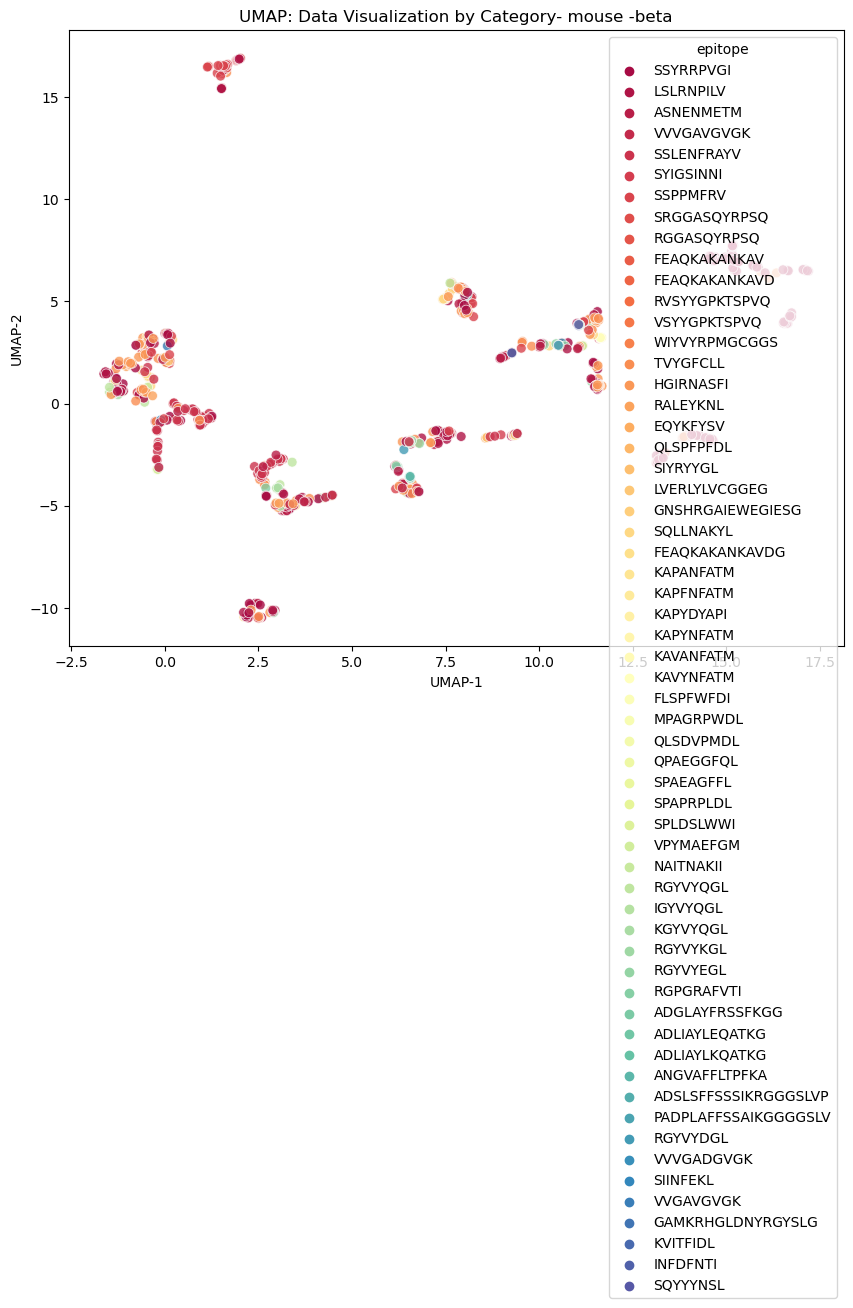

In [129]:
reducer = umap.UMAP(random_state= 42)
human_data = StandardScaler().fit_transform(tr_bm.pw_cdr3_b_aa)
embedding = reducer.fit_transform(human_data)
embedding_df = pd.DataFrame(embedding, columns= ['UMAP-1', 'UMAP-2'])

l=df_bm['epitope'].tolist()
embedding_df['epitope']=l

plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP-1', y='UMAP-2', data=embedding_df,hue='epitope',palette='Spectral', s=50, alpha=0.8)
plt.title('UMAP: Data Visualization by Category- mouse -beta')
plt.show()

In [314]:
np.savetxt('Beta_mouse.csv',tr_bm.pw_cdr3_b_aa,delimiter=',',fmt='%d')

### Human

In [67]:
df_bh=df_Beta[df_Beta['subject']=='HomoSapiens']
print(len(df_bh))
df_bh=df_bh.drop(['subject'], axis=1)
df_bh = df_bh.groupby(list(df_bh.columns)).size().reset_index(name='count')

6539


In [68]:
tr_bh = TCRrep(cell_df = df_bh,
            organism = 'human',
            chains = ['beta'],
            db_file = 'alphabeta_gammadelta_db.tsv')
tr_bh.pw_beta
tr_bh.pw_cdr3_b_aa

C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:833: FutureWarning: The provided callable <function sum at 0x0000017E9F3ADA80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  clones = cell_df.groupby(index_cols)['count'].agg(np.sum).reset_index()


array([[ 0, 38, 36, ..., 40, 34, 33],
       [38,  0, 23, ..., 40, 32, 36],
       [36, 23,  0, ..., 52, 36, 26],
       ...,
       [40, 40, 52, ...,  0, 35, 47],
       [34, 32, 36, ..., 35,  0, 32],
       [33, 36, 26, ..., 47, 32,  0]], dtype=int16)

In [69]:
Beta_human_vector = pd.DataFrame(tr_bh.pw_cdr3_b_aa)
#Beta_human_vector.to_csv('Beta_human_vector.csv')

In [70]:
df1 = df_bh.reset_index(drop=True)
df2 = Beta_human_vector.reset_index(drop=True)
result = pd.concat([df1, df2], axis=1)
result.to_csv('Beta_human_vector.csv')

C:\Users\shara\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


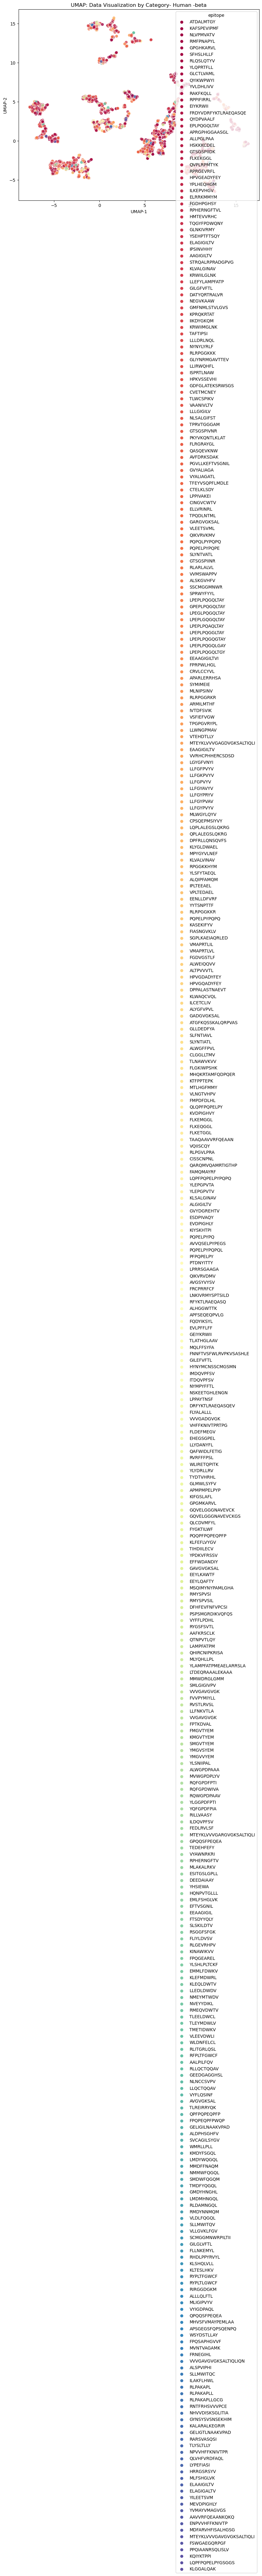

In [135]:
reducer = umap.UMAP(random_state= 42)
human_data = StandardScaler().fit_transform(tr_bh.pw_cdr3_b_aa)
embedding = reducer.fit_transform(human_data)
embedding_df = pd.DataFrame(embedding, columns= ['UMAP-1', 'UMAP-2'])

l=df_bh['epitope'].tolist()
embedding_df['epitope']=l

plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP-1', y='UMAP-2', data=embedding_df,hue='epitope',palette='Spectral', s=50, alpha=0.8)
plt.title('UMAP: Data Visualization by Category- Human -beta')
plt.show()

### Alpha and Beta Chain

In [45]:
df_a_b = df1.loc[(df1['complex.id']!=0)]
df_a_b=df_a_b.rename(columns={'antigen.epitope': 'epitope', 'v.segm': 'v_a_gene','j.segm': 'j_a_gene','cdr3': 'cdr3_a_aa','species':'subject'})

In [46]:
df_a_b = df_a_b.drop([ 'mhc.a','mhc.b','mhc.class','antigen.gene','antigen.species'], axis=1)

In [47]:
df_paired_alpha=df_a_b.loc[df_a_b.gene=='TRA']
df_paired_beta=df_a_b.loc[df_a_b.gene=='TRB']

In [48]:
df_paired_ab=pd.merge(df_paired_alpha, df_paired_beta, on='complex.id', how='outer')
df_paired_ab1=df_paired_ab.dropna()
df_paired_ab1 = df_paired_ab1.drop([ 'gene_x','subject_x','epitope_x','gene_y','complex.id'], axis=1)
df_paired_ab1=df_paired_ab1.rename(columns={'cdr3_a_aa_x':'cdr3_a_aa','cdr3_a_aa_y':'cdr3_b_aa','v_a_gene_x': 'v_a_gene', 'j_a_gene_x': 'j_a_gene','v_a_gene_y': 'v_b_gene','cdr3': 'cdr3_a_aa','j_a_gene_y':'j_b_gene','epitope_y':'epitope'})

### Mouse

In [73]:
df_ab_bm=df_paired_ab1 [df_paired_ab1 ['subject_y']=='MusMusculus']
df_ab_bm=df_ab_bm.drop(['subject_y'], axis=1)
df_ab_bm = df_ab_bm.groupby(list(df_ab_bm.columns)).size().reset_index(name='count')

tr_bm_ab = TCRrep(cell_df = df_ab_bm,
            organism = 'mouse',
            chains = ['alpha','beta'],
            db_file = 'alphabeta_gammadelta_db.tsv')
tr_bm_ab.pw_beta
tr_bm_ab.pw_cdr3_b_aa
tr_bm_ab.pw_alpha
tr_bm_ab.pw_cdr3_a_aa

C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:833: FutureWarning: The provided callable <function sum at 0x0000017E9F3ADA80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  clones = cell_df.groupby(index_cols)['count'].agg(np.sum).reset_index()


array([[ 0, 24, 24, ..., 36, 36, 23],
       [24,  0, 20, ..., 12, 12, 30],
       [24, 20,  0, ..., 34, 36, 26],
       ...,
       [36, 12, 34, ...,  0,  4, 33],
       [36, 12, 36, ...,  4,  0, 35],
       [23, 30, 26, ..., 33, 35,  0]], dtype=int16)

In [74]:
human_paired=tr_bm_ab.pw_beta+tr_bm_ab.pw_alpha
human_paired

array([[  0, 247, 244, ..., 299, 299, 203],
       [247,   0, 111, ..., 243, 107, 293],
       [244, 111,   0, ..., 304, 162, 276],
       ...,
       [299, 243, 304, ...,   0, 163, 240],
       [299, 107, 162, ..., 163,   0, 252],
       [203, 293, 276, ..., 240, 252,   0]], dtype=int16)

In [75]:
paired_vector = pd.DataFrame(human_paired)
#paired_vector.to_csv('Paired_vector.csv')

In [76]:
df1 = df_ab_bm.reset_index(drop=True)
df2 = paired_vector.reset_index(drop=True)
result = pd.concat([df1, df2], axis=1)
result.to_csv('paired_vector_mouse.csv')

C:\Users\shara\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


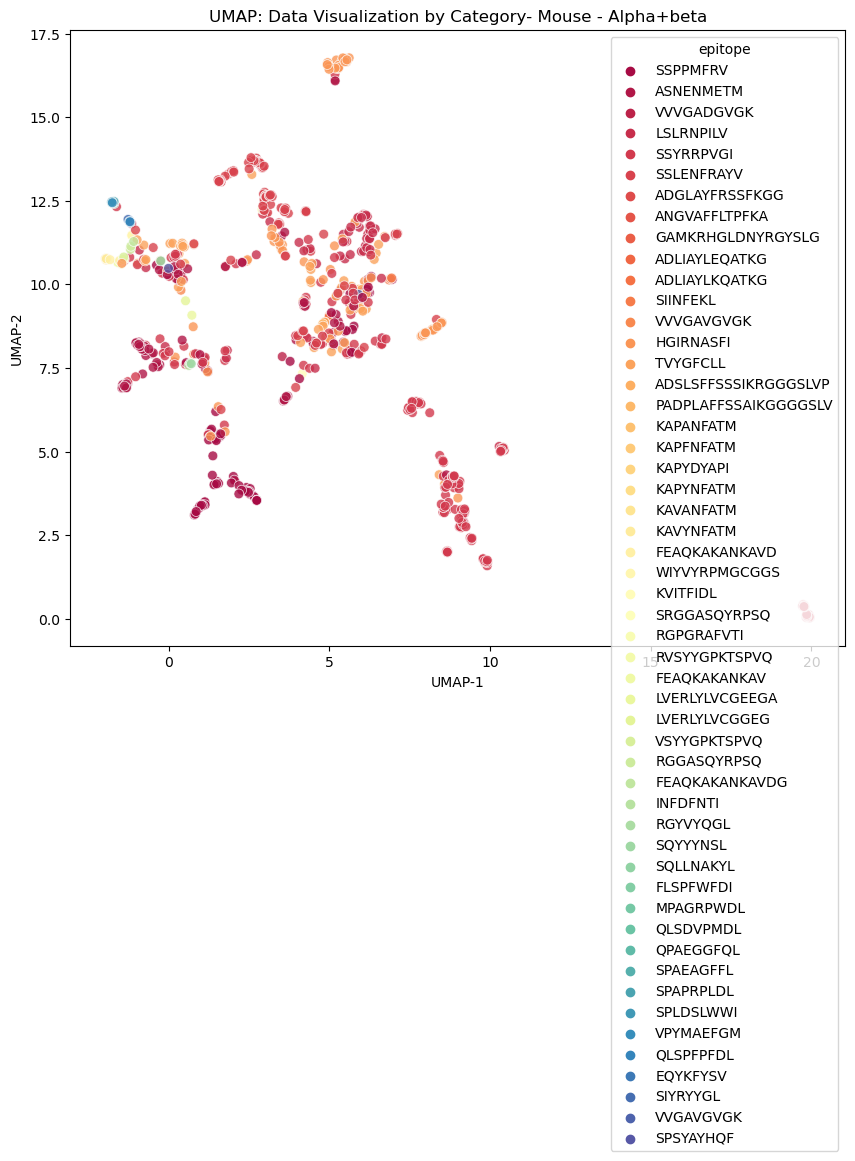

In [173]:
reducer = umap.UMAP(random_state= 42)
human_data = StandardScaler().fit_transform(human_paired)
embedding = reducer.fit_transform(human_data)
embedding_df = pd.DataFrame(embedding, columns= ['UMAP-1', 'UMAP-2'])

l=df_ab_bm['epitope'].tolist()
embedding_df['epitope']=l

plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP-1', y='UMAP-2', data=embedding_df,hue='epitope',palette='Spectral', s=50, alpha=0.8)
plt.title('UMAP: Data Visualization by Category- Mouse - Alpha+beta')
plt.show()

### Human

In [77]:
df_ab_bh=df_paired_ab1 [df_paired_ab1 ['subject_y']=='HomoSapiens']
df_ab_bh=df_ab_bh.drop(['subject_y'], axis=1)
df_ab_bh = df_ab_bh.groupby(list(df_ab_bh.columns)).size().reset_index(name='count')

#print(df_ab_bh.head())

tr_bh_ab = TCRrep(cell_df = df_ab_bh,
            organism = 'human',
            chains = ['alpha','beta'],
            db_file = 'alphabeta_gammadelta_db.tsv')
tr_bh_ab.pw_beta
tr_bh_ab.pw_cdr3_b_aa
tr_bh_ab.pw_alpha
tr_bh_ab.pw_cdr3_a_aa

C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:833: FutureWarning: The provided callable <function sum at 0x0000017E9F3ADA80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  clones = cell_df.groupby(index_cols)['count'].agg(np.sum).reset_index()


array([[ 0, 24, 32, ..., 33, 28, 36],
       [24,  0, 24, ..., 25, 30, 31],
       [32, 24,  0, ..., 24, 25, 26],
       ...,
       [33, 25, 24, ...,  0, 32, 19],
       [28, 30, 25, ..., 32,  0, 35],
       [36, 31, 26, ..., 19, 35,  0]], dtype=int16)

In [78]:
human_paired=tr_bh_ab.pw_beta+tr_bh_ab.pw_alpha
human_paired

array([[  0, 294, 295, ..., 315, 328, 341],
       [294,   0, 243, ..., 255, 323, 278],
       [295, 243,   0, ..., 210, 303, 277],
       ...,
       [315, 255, 210, ...,   0, 330, 275],
       [328, 323, 303, ..., 330,   0, 320],
       [341, 278, 277, ..., 275, 320,   0]], dtype=int16)

In [81]:
paired_vector = pd.DataFrame(human_paired)

In [82]:
df1 = df_ab_bh.reset_index(drop=True)
df2 = paired_vector.reset_index(drop=True)
result = pd.concat([df1, df2], axis=1)
result.to_csv('paired_vector_human.csv')

C:\Users\shara\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


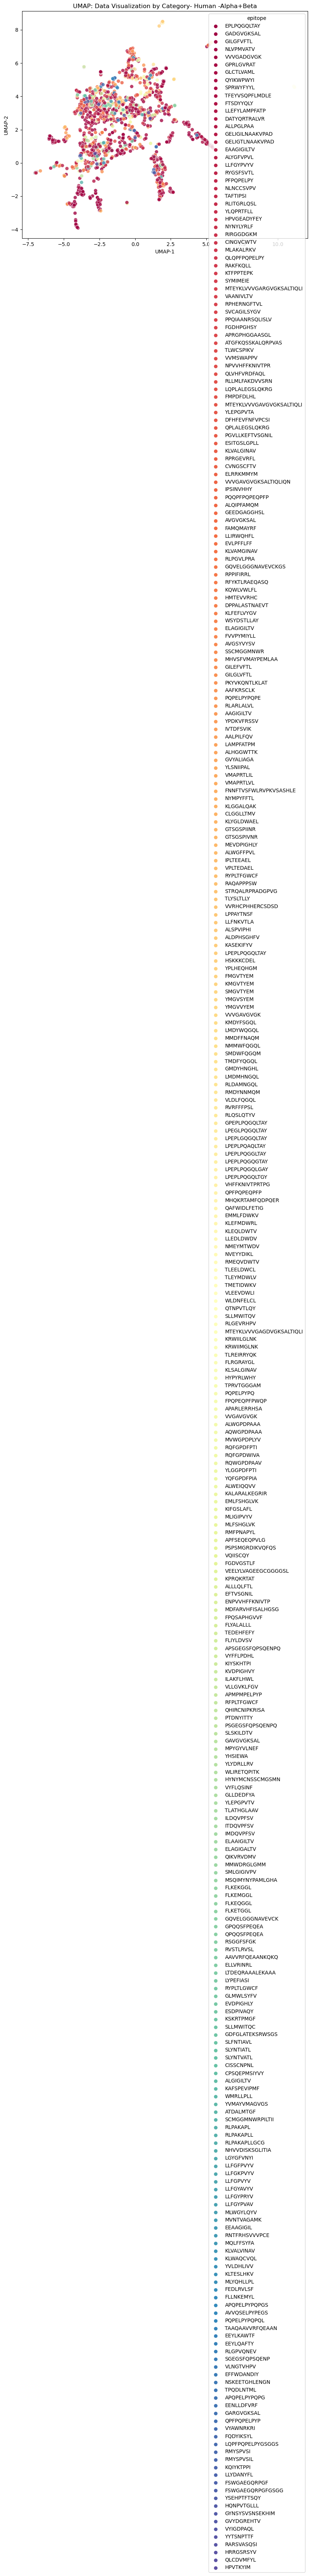

In [169]:
reducer = umap.UMAP(random_state= 42)
human_data = StandardScaler().fit_transform(human_paired)
embedding = reducer.fit_transform(human_data)
embedding_df = pd.DataFrame(embedding, columns= ['UMAP-1', 'UMAP-2'])

l=df_ab_bh['epitope'].tolist()
embedding_df['epitope']=l

plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP-1', y='UMAP-2', data=embedding_df,hue='epitope',palette='Spectral', s=50, alpha=0.8)
plt.title('UMAP: Data Visualization by Category- Human -Alpha+Beta')
plt.show()